In [ ]:
pip install Covariance-Descriptor

In [ ]:
pip install pycharm

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from wordcloud import WordCloud,STOPWORDS

In [2]:
dsent = pd.read_csv('dsent.csv',
                   index_col = False,
                   low_memory = False)

In [3]:
#Delete first two columns 

dsent = dsent.iloc[: , 2:]
display(dsent)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,attributes.RestaurantsDelivery,...,Ambience_casual,BP_garage,BP_street,BP_validated,BP_lot,BP_valet,text_upr,lemmatized,lemma_str,sentiment
0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,True,...,False,False,False,False,True,False,"['I', 'have', 'been', 'here', 'twice', 'and', ...","['twice', 'really', 'good', 'food', 'service',...",twice really good food service time get burger...,0.182259
1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,True,...,True,False,False,False,False,True,"['Quickly', 'stopped', 'in', 'for', 'a', 'UFC'...","['quickly', 'stop', 'ufc', 'fight', 'sit', 'ba...",quickly stop ufc fight sit bar boyfriend park ...,0.288889
2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,True,...,True,False,False,False,True,False,"['I', 'think', 'their', 'rice', 'dishes', 'are...","['think', 'rice', 'dish', 'way', 'well', 'pho'...",think rice dish way well pho 's also really li...,0.350000
3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,False,...,False,False,False,False,True,False,"['When', 'we', 'first', 'arrived', 'at', 'the'...","['first', 'arrive', 'coco', 'key', 'greet', 'n...",first arrive coco key greet number staff membe...,-0.071723
4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,True,...,True,False,True,False,True,False,"['3.5', 'stars!', 'I', 'got', 'the', 'avocado'...","['3.5', 'star', 'get', 'avocado', 'margarita',...",3.5 star get avocado margarita delicious custo...,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214869,Mc6gBUoqj8VNyGHBOTIPCw,_XXa8CyI4uKOdu6RRbWE4g,cs6HfZNykLVitm09jWFqWg,4,5,3,4,I went here for brunch with 2 friends on a Sun...,2018-04-17 00:28:02,False,...,True,False,True,False,False,True,"['I', 'went', 'here', 'for', 'brunch', 'with',...","['go', 'brunch', '2', 'friend', 'sunday', 'awh...",go brunch 2 friend sunday awhile back buffet s...,0.500000
214870,jDMk2EEGG-fkuA2rnCr0zg,KTgetFhipsOG1vWfVuSaiA,cs6HfZNykLVitm09jWFqWg,5,0,0,0,Our group shared dinner entrees and side dishe...,2017-10-13 21:02:12,False,...,True,False,True,False,False,True,"['Our', 'group', 'shared', 'dinner', 'entrees'...","['group', 'share', 'dinner', 'entree', 'side',...",group share dinner entree side dish best food ...,0.125000
214871,MbmrN5q_JKkokjOdqLXxhQ,SF2Hu55kX9QJDvZETuZ9eg,uXOVFQraz1va1TrtgiqYTg,4,0,0,0,This was a fun place to dine. It is a one chef...,2016-10-31 20:47:16,False,...,True,False,True,False,False,False,"['This', 'was', 'a', 'fun', 'place', 'to', 'di...","['fun', 'place', 'dine', 'one', 'chef', 'kitch...",fun place dine one chef kitchen wait 1 hr get ...,0.362500
214872,2n2PbNLYlQSRs88VrZtrGg,_BwuIa1-qjIL1PdYB_awyA,Gzo1G_mMc2kpduvK2yQFYg,2,0,0,0,The food was ok. I order the pork bites and it...,2015-07-21 13:21:59,False,...,True,False,False,False,True,False,"['The', 'food', 'was', 'ok.', 'I', 'order', 't...","['food', 'ok', 'order', 'pork', 'bite', 'good'...",food ok order pork bite good wife order combin...,-0.051852


In [4]:
#correlation between number of stars and sentiment

np.corrcoef(dsent['stars_x'], dsent['sentiment'])[0,1]

0.5406402811740255

In [5]:
#correlation between the number of points in "useful" and sentiment

np.corrcoef(dsent['useful_x'], dsent['sentiment'])[0,1]

-0.09711314195423232

In [6]:
#correlation between the number of points in "funny" and sentiment

np.corrcoef(dsent['funny_x'], dsent['sentiment'])[0,1]

-0.06566284337148244

In [7]:
#correlation between the number of points in "cool" and sentiment

np.corrcoef(dsent['cool_x'], dsent['sentiment'])[0,1]

-0.02209042577683767

In [8]:
#correlation between the number of stars and the number of points in "cool"

np.corrcoef(dsent['cool_x'], dsent['stars_x'])[0,1]

0.04146883681268564

In [9]:
#Find out which attributes are boolean or numerical

atr = []
for column in [i for i in dsent.columns if dsent[i].dtype == 'bool' or dsent[i].dtype == 'int' or dsent[i].dtype == 'float']: 
    atr.append(column)

atr

['attributes.RestaurantsDelivery',
 'attributes.DogsAllowed',
 'attributes.CoatCheck',
 'attributes.RestaurantsGoodForGroups',
 'attributes.BYOB',
 'stars_y',
 'attributes.RestaurantsPriceRange2',
 'attributes.RestaurantsTableService',
 'attributes.Corkage',
 'attributes.GoodForKids',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.HappyHour',
 'attributes.WheelchairAccessible',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.ByAppointmentOnly',
 'attributes.HasTV',
 'attributes.GoodForDancing',
 'attributes.Caters',
 'attributes.RestaurantsReservations',
 'attributes.RestaurantsTakeOut',
 'attributes.BikeParking',
 'attributes.OutdoorSeating',
 'average_stars',
 'Good_Meals_dessert',
 'Good_Meals_latenight',
 'Good_Meals_lunch',
 'Good_Meals_dinner',
 'Good_Meals_brunch',
 'Good_Meals_breakfast',
 'Ambience_touristy',
 'Ambience_hipster',
 'Ambience_romantic',
 'Ambience_divey',
 'Ambience_intimate',
 'Ambience_trendy',
 'Ambience_upscale',
 'Ambience_classy',
 'Ambience_cas

In [10]:
for s in atr:
    print(s)

attributes.RestaurantsDelivery
attributes.DogsAllowed
attributes.CoatCheck
attributes.RestaurantsGoodForGroups
attributes.BYOB
stars_y
attributes.RestaurantsPriceRange2
attributes.RestaurantsTableService
attributes.Corkage
attributes.GoodForKids
attributes.BusinessAcceptsBitcoin
attributes.HappyHour
attributes.WheelchairAccessible
attributes.BusinessAcceptsCreditCards
attributes.ByAppointmentOnly
attributes.HasTV
attributes.GoodForDancing
attributes.Caters
attributes.RestaurantsReservations
attributes.RestaurantsTakeOut
attributes.BikeParking
attributes.OutdoorSeating
average_stars
Good_Meals_dessert
Good_Meals_latenight
Good_Meals_lunch
Good_Meals_dinner
Good_Meals_brunch
Good_Meals_breakfast
Ambience_touristy
Ambience_hipster
Ambience_romantic
Ambience_divey
Ambience_intimate
Ambience_trendy
Ambience_upscale
Ambience_classy
Ambience_casual
BP_garage
BP_street
BP_validated
BP_lot
BP_valet
sentiment


In [11]:
#Correlation of attributes with sentiment

korelace_s = []
for i in atr:
    korelace_s.append(np.corrcoef(dsent[i], dsent['sentiment'])[0,1])
    
korelace_s

[0.044835708656649265,
 0.042893424385191455,
 -0.017049630428075595,
 0.007105961257087404,
 -0.04233319026385109,
 0.23275155167724132,
 nan,
 -0.024381249105571646,
 -0.018558281132818037,
 -0.005022042182834859,
 -0.0499138160264053,
 -0.017036016888616907,
 0.011979000488763583,
 0.03622161882347585,
 -0.04873310616861018,
 -0.08206214144909743,
 -0.014015511414260226,
 -0.028254975567845092,
 0.06771544055997611,
 0.08304071548728699,
 0.016626152060341588,
 0.054980199833338544,
 0.31470213099280625,
 0.023856761578176403,
 -0.05569616691791544,
 0.048892897680647904,
 0.09092060540842832,
 0.04929693919445157,
 0.04151313217583332,
 0.005930121984298773,
 0.011799441224350605,
 0.012034551658470526,
 -0.015146781660856137,
 0.02686267995564675,
 0.06343704014331279,
 0.041371271473214795,
 0.08122227511697787,
 0.007752992549108895,
 -0.01712118856068533,
 0.007362520506419452,
 0.025019775168823272,
 0.02690581551174851,
 0.04270761331324871,
 0.9999999999999999]

In [12]:
#Correlation of attributes with number or stars

korelace_h = []
for n in atr:
    korelace_h.append(np.corrcoef(dsent[n], dsent['stars_x'])[0,1])
    
korelace_h

[0.03354102120345417,
 0.06143426330982261,
 0.016878229906914965,
 -0.035362289387450875,
 -0.053955271389278504,
 0.39545840426945544,
 nan,
 -0.09263759679489351,
 -0.013404965095031578,
 0.04043131941891117,
 -0.08174136409310753,
 -0.10459079700252685,
 -0.017308208321787547,
 0.022333604683652745,
 -0.10752474276991479,
 -0.12487417329948557,
 0.026423843072582377,
 -0.0416597302107512,
 -0.012291876441050786,
 0.06050745223176078,
 0.019110221573685606,
 0.017044515318220817,
 0.5098275132904319,
 0.02693333367278222,
 -0.061573128900331495,
 0.10545285589928877,
 0.07455189784896699,
 0.06458305339513606,
 0.06877912113115375,
 -0.009324441016434166,
 0.04306164052463103,
 -0.0011499736749026965,
 0.0012697688706500918,
 0.03534090789544468,
 0.058146158127706404,
 0.020794406360174374,
 0.08146225128660535,
 0.04370106607069939,
 -0.031028014550975463,
 0.047117117191343226,
 0.010160959587120084,
 0.06794763911262876,
 0.019847711733653822,
 0.5406402811740255]

In [13]:
d = {'attributes': atr,'correlation_s': korelace_s, 'correlation_h': korelace_h}
dkorel = pd.DataFrame(data=d)
dkorel

,attributes,correlation_s,correlation_h
0,attributes.RestaurantsDelivery,0.044836,0.033541
1,attributes.DogsAllowed,0.042893,0.061434
2,attributes.CoatCheck,-0.017050,0.016878
3,attributes.RestaurantsGoodForGroups,0.007106,-0.035362
4,attributes.BYOB,-0.042333,-0.053955
5,stars_y,0.232752,0.395458
6,attributes.RestaurantsPriceRange2,NaN,NaN
7,attributes.RestaurantsTableService,-0.024381,-0.092638
8,attributes.Corkage,-0.018558,-0.013405
9,attributes.GoodForKids,-0.005022,0.040431


In [14]:
print(dsent['city'].unique())

['Atlanta' 'Austin' 'Orlando' 'Portland' 'Boston']


In [15]:
#The average sentiment between cities

mean(dsent['sentiment'])

0.26414373570126587

In [16]:
#Setting boundaries for ranking positivity / neutrality / negativity of the review

condition = [(dsent['sentiment'] <= -0.25),
            (dsent['sentiment'] > -0.25) & (dsent['sentiment'] < 0.25),
            (dsent['sentiment'] >= 0.25)]

values = ['Negative', 'Neutral', 'Positive']

dsent['Classification'] = np.select(condition, values)

In [17]:
dsent['year'] = pd.DatetimeIndex(dsent['date']).year

In [18]:
display(dsent)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,attributes.RestaurantsDelivery,...,BP_street,BP_validated,BP_lot,BP_valet,text_upr,lemmatized,lemma_str,sentiment,Classification,year
0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57,True,...,False,False,True,False,"['I', 'have', 'been', 'here', 'twice', 'and', ...","['twice', 'really', 'good', 'food', 'service',...",twice really good food service time get burger...,0.182259,Neutral,2011
1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01,True,...,False,False,False,True,"['Quickly', 'stopped', 'in', 'for', 'a', 'UFC'...","['quickly', 'stop', 'ufc', 'fight', 'sit', 'ba...",quickly stop ufc fight sit bar boyfriend park ...,0.288889,Positive,2015
2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,True,...,False,False,True,False,"['I', 'think', 'their', 'rice', 'dishes', 'are...","['think', 'rice', 'dish', 'way', 'well', 'pho'...",think rice dish way well pho 's also really li...,0.350000,Positive,2017
3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27,False,...,False,False,True,False,"['When', 'we', 'first', 'arrived', 'at', 'the'...","['first', 'arrive', 'coco', 'key', 'greet', 'n...",first arrive coco key greet number staff membe...,-0.071723,Neutral,2017
4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57,True,...,True,False,True,False,"['3.5', 'stars!', 'I', 'got', 'the', 'avocado'...","['3.5', 'star', 'get', 'avocado', 'margarita',...",3.5 star get avocado margarita delicious custo...,0.400000,Positive,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214869,Mc6gBUoqj8VNyGHBOTIPCw,_XXa8CyI4uKOdu6RRbWE4g,cs6HfZNykLVitm09jWFqWg,4,5,3,4,I went here for brunch with 2 friends on a Sun...,2018-04-17 00:28:02,False,...,True,False,False,True,"['I', 'went', 'here', 'for', 'brunch', 'with',...","['go', 'brunch', '2', 'friend', 'sunday', 'awh...",go brunch 2 friend sunday awhile back buffet s...,0.500000,Positive,2018
214870,jDMk2EEGG-fkuA2rnCr0zg,KTgetFhipsOG1vWfVuSaiA,cs6HfZNykLVitm09jWFqWg,5,0,0,0,Our group shared dinner entrees and side dishe...,2017-10-13 21:02:12,False,...,True,False,False,True,"['Our', 'group', 'shared', 'dinner', 'entrees'...","['group', 'share', 'dinner', 'entree', 'side',...",group share dinner entree side dish best food ...,0.125000,Neutral,2017
214871,MbmrN5q_JKkokjOdqLXxhQ,SF2Hu55kX9QJDvZETuZ9eg,uXOVFQraz1va1TrtgiqYTg,4,0,0,0,This was a fun place to dine. It is a one chef...,2016-10-31 20:47:16,False,...,True,False,False,False,"['This', 'was', 'a', 'fun', 'place', 'to', 'di...","['fun', 'place', 'dine', 'one', 'chef', 'kitch...",fun place dine one chef kitchen wait 1 hr get ...,0.362500,Positive,2016
214872,2n2PbNLYlQSRs88VrZtrGg,_BwuIa1-qjIL1PdYB_awyA,Gzo1G_mMc2kpduvK2yQFYg,2,0,0,0,The food was ok. I order the pork bites and it...,2015-07-21 13:21:59,False,...,False,False,True,False,"['The', 'food', 'was', 'ok.', 'I', 'order', 't...","['food', 'ok', 'order', 'pork', 'bite', 'good'...",food ok order pork bite good wife order combin...,-0.051852,Neutral,2015


In [19]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [20]:
#How many reviews are positive, neutral or negative in the given cities

klasifikace = dsent.groupby('city')['Classification'].value_counts()
klasifikace

city      Classification
Atlanta   Positive          20032
          Neutral           17124
          Negative            739
Austin    Positive          37644
          Neutral           30480
          Negative            962
Boston    Positive          22026
          Neutral           21243
          Negative            799
Orlando   Positive          14379
          Neutral           12060
          Negative            675
Portland  Positive          20642
          Neutral           15647
          Negative            422
Name: Classification, dtype: int64

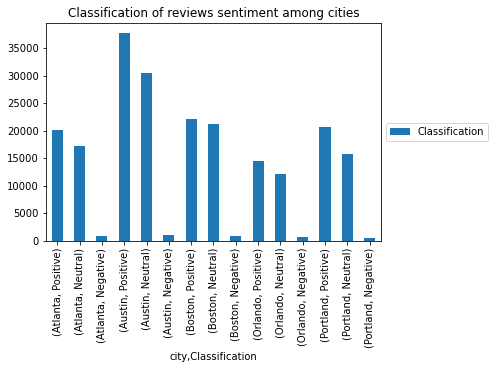

In [21]:
e = plt.figure()
plt.title('Classification of reviews sentiment among cities', color='black')
klasifikace.plot(kind='bar', ax=e.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

e.savefig('classification_of_reviews.png', bbox_inches = 'tight')

In [22]:
#Individual averages of city values - the ranking is in line with sentiment

meanh = dsent.groupby('city')['sentiment','stars_x','useful_x','cool_x','funny_x'].mean()
meanh

C:\Users\Dell\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,sentiment,stars_x,useful_x,cool_x,funny_x
city,,,,,
Atlanta,0.261732,3.771289,0.901887,0.440296,0.334266
Austin,0.272134,4.026691,1.014952,0.560461,0.439423
Boston,0.245616,3.678497,0.943406,0.405124,0.368499
Orlando,0.256321,3.735377,1.073800,0.502360,0.349782
Portland,0.279615,4.000409,0.969192,0.531339,0.432295


In [23]:
meanh_t = meanh.T
meanh_t

city,Atlanta,Austin,Boston,Orlando,Portland
sentiment,0.261732,0.272134,0.245616,0.256321,0.279615
stars_x,3.771289,4.026691,3.678497,3.735377,4.000409
useful_x,0.901887,1.014952,0.943406,1.073800,0.969192
cool_x,0.440296,0.560461,0.405124,0.502360,0.531339
funny_x,0.334266,0.439423,0.368499,0.349782,0.432295


In [24]:
#The mean of evaluation of reviews in case of being useful, cool or funny among cities 

meanm = dsent.groupby('city')['useful_x','cool_x','funny_x'].mean()
meanm

C:\Users\Dell\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,useful_x,cool_x,funny_x
city,,,
Atlanta,0.901887,0.440296,0.334266
Austin,1.014952,0.560461,0.439423
Boston,0.943406,0.405124,0.368499
Orlando,1.073800,0.502360,0.349782
Portland,0.969192,0.531339,0.432295


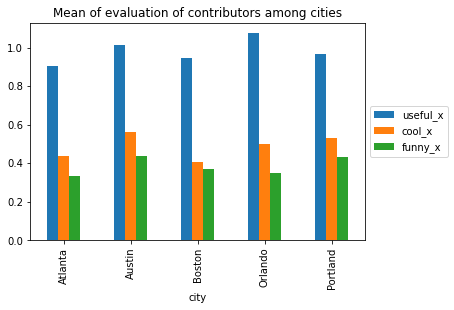

In [25]:
o = plt.figure()
plt.title('Mean of evaluation of contributors among cities', color='black')
meanm.plot(kind='bar', ax=o.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

o.savefig('evaluation_of_contributors.png', bbox_inches = 'tight')

In [26]:
mean1 = dsent.groupby('city')['stars_x'].mean()
mean1

city
Atlanta     3.771289
Austin      4.026691
Boston      3.678497
Orlando     3.735377
Portland    4.000409
Name: stars_x, dtype: float64

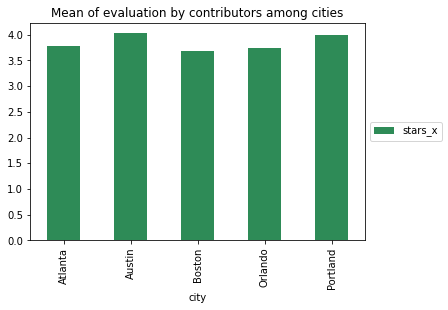

In [27]:
r = plt.figure()
plt.title('Mean of evaluation by contributors among cities', color='black')
mean1.plot(kind='bar', color='seagreen', ax=r.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

r.savefig('evaluation_by_contributors.png', bbox_inches = 'tight')

In [28]:
mean2 = dsent.groupby('city')['sentiment'].mean()
mean2

city
Atlanta     0.261732
Austin      0.272134
Boston      0.245616
Orlando     0.256321
Portland    0.279615
Name: sentiment, dtype: float64

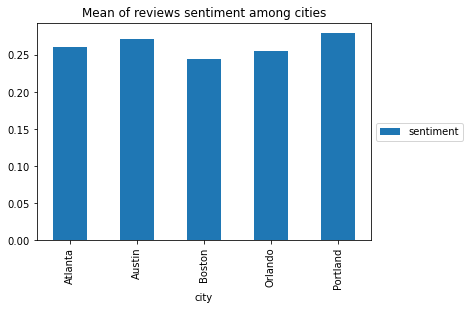

In [29]:
q = plt.figure()
plt.title('Mean of reviews sentiment among cities', color = 'black')
mean2.plot(kind = 'bar', ax=q.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

q.savefig('reviews_sentiment.png', bbox_inches = 'tight')

In [30]:
meanyear = dsent.groupby(['city', 'year'])['sentiment'].mean()
meanyear

city      year
Atlanta   2006    0.169125
          2007    0.235214
          2008    0.220547
          2009    0.238621
          2010    0.239373
                    ...   
Portland  2017    0.288529
          2018    0.287172
          2019    0.280335
          2020    0.277055
          2021    0.229222
Name: sentiment, Length: 85, dtype: float64

In [31]:
meanamb = dsent.groupby('city')['Ambience_touristy','Ambience_hipster','Ambience_romantic','Ambience_divey','Ambience_intimate','Ambience_trendy','Ambience_upscale','Ambience_classy','Ambience_casual'].mean()
meanamb

meanamb.to_csv('meanamb.csv')

C:\Users\Dell\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


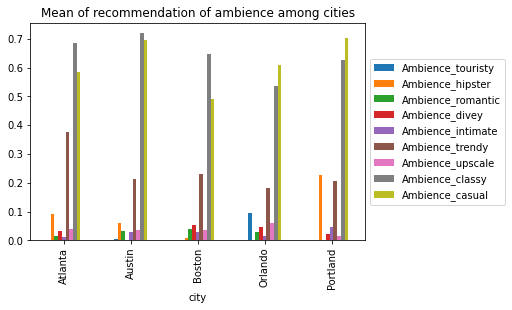

In [32]:
from matplotlib.backends.backend_pdf import PdfPages
j = plt.figure()
plt.title('Mean of recommendation of ambience among cities', color='black')
meanamb.plot(kind='bar', ax=j.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

j.savefig('mean_amb.png',bbox_inches='tight')

In [33]:
meangfm = dsent.groupby('city')['Good_Meals_dessert','Good_Meals_latenight','Good_Meals_lunch', 'Good_Meals_dinner','Good_Meals_brunch','Good_Meals_breakfast'].mean()
meangfm

meangfm.to_csv('mean_good_for_meal.csv')

C:\Users\Dell\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


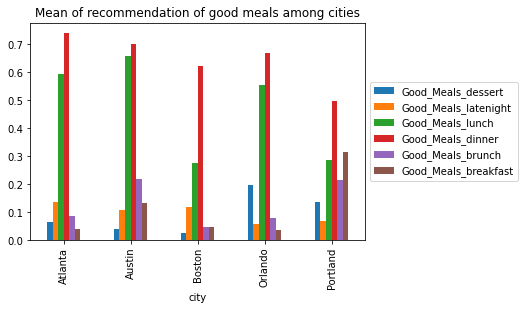

In [34]:
h = plt.figure()
plt.title('Mean of recommendation of good meals among cities', color='black')
meangfm.plot(kind='bar', ax=h.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

h.savefig('mean_good_for_meal.png',bbox_inches='tight')

In [35]:
meanbp = dsent.groupby('city')['BP_garage', 'BP_street', 'BP_validated', 'BP_lot', 'BP_valet'].mean()
meanbp

meanbp.to_csv('mean_business_parking.csv')

C:\Users\Dell\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


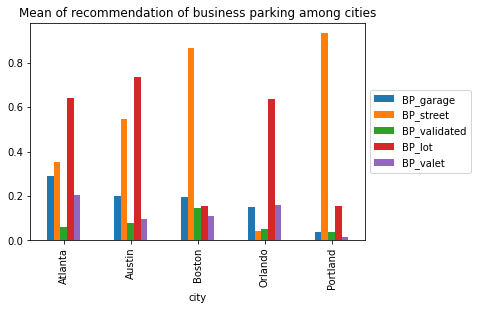

In [36]:
f = plt.figure()
plt.title('Mean of recommendation of business parking among cities', color='black')
meanbp.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

f.savefig('mean_business_parking.png',bbox_inches='tight')

In [37]:
slova = dsent.groupby('city')['lemma_str'].unique()
slova

city
Atlanta     [twice really good food service time get burge...
Austin      [think rice dish way well pho 's also really l...
Boston      [never year legal seafood dedication bad meal ...
Orlando     [first arrive coco key greet number staff memb...
Portland    [incredible donut sometimes go early full sele...
Name: lemma_str, dtype: object